In [33]:
# import dataset, name it as df
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("used_cars.csv")
df.head()

Saving used_cars.csv to used_cars (2).csv


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [34]:
# Dataset information
# Check for number of observations and varibales, varible types

# Varible name and date type
for column in df.columns:
  print(f"{column}: {df[column].dtype}")

# Shape
df.shape

brand: object
model: object
model_year: int64
milage: object
fuel_type: object
engine: object
transmission: object
ext_col: object
int_col: object
accident: object
clean_title: object
price: object


(4009, 12)

In [35]:
# Clean numeric feature data
from matplotlib.ticker import MaxNLocator
import re

# "milage"
df['milage'] = df['milage'].str.replace(r'\D', '', regex=True)
df['milage'] = df['milage'].astype(int)

# "price"
df['price'] = df['price'].str.replace(',', '', regex=True)
df['price'] = df['price'].str.replace(r'\$', '', regex=True)
df['price'] = df['price'].astype(int)

df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [36]:
import numpy as np

# Handling missing values
missing_values = df.isnull().sum()
missing_values

# fuel_type
df['fuel_type'] = df['fuel_type'].fillna('Unknown') # treating missing fuel_type entries as "Unknown" maintains the categorical nature

# accident
np.random.seed(170)
df['accident'] = df['accident'].replace({'None reported': 'no'}) # normalized
df['accident'] = df['accident'].replace({'At least 1 accident or damage reported': 'yes'})
accident_missing_entry = df['accident'].isnull()
accident_random_choices = np.random.choice(['yes', 'no'], size=accident_missing_entry.sum())
df.loc[accident_missing_entry, 'accident'] = accident_random_choices  # Fill in missing values with random generate value 'yes' or 'no

# clean_title
df['clean_title'] = df['clean_title'].str.lower()
df['clean_title'] = df['clean_title'].replace({'accident or damage reported': 'no'}) # normalized
title_missing_entry = df['clean_title'].isnull()
title_random_choices = np.random.choice(['yes', 'no'], size=title_missing_entry.sum())
df.loc[title_missing_entry, 'clean_title'] = title_random_choices  # Fill in missing values with random generate value 'yes' or 'no
df.head()



,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,yes,yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,yes,yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,no,yes,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,no,yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,no,yes,34999


In [37]:
# Check for missing value again
missing_values = df.isnull().sum()
missing_values

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [40]:
from sklearn.model_selection import train_test_split

# Set the target variable (price)
y = df['price']

# Set the features (exclude the price column)
X = df.drop(columns=['price'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [41]:
from sklearn.ensemble import RandomForestRegressor
# Feature selection using random forest

# One-Hot Encode Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)  # Drop first to avoid multicollinearity

# Set Target and Features
y = df_encoded['price']
X = df_encoded.drop(columns=['price'])

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize and Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display Results
print("Top Important Features:")
print(feature_importances)

Top Important Features:
                                                Feature  Importance
1                                                milage    0.307038
47                                    brand_Rolls-Royce    0.123847
26                                    brand_Lamborghini    0.113696
14                                        brand_Ferrari    0.037817
348                            model_Aventador SVJ Base    0.035645
...                                                 ...         ...
3086  engine_797.0HP 6.2L 8 Cylinder Engine Gasoline...    0.000000
3087            engine_8.0L W16 64V GDI DOHC Twin Turbo    0.000000
408                       model_CLK-Class 500 Cabriolet    0.000000
2137  engine_190.0HP 4.3L V6 Cylinder Engine Gasolin...    0.000000
861                            model_Genesis Coupe 2.0T    0.000000

[3643 rows x 2 columns]


In [42]:
top20_features = feature_importances.head(20)
top20_importance_sum = top20_features['Importance'].sum()
print(top20_features)
print("Sum importance of top 20 important features: ",top20_importance_sum)

                                             Feature  Importance
1                                             milage    0.307038
47                                 brand_Rolls-Royce    0.123847
26                                 brand_Lamborghini    0.113696
14                                     brand_Ferrari    0.037817
348                         model_Aventador SVJ Base    0.035645
44                                     brand_Porsche    0.030115
0                                         model_year    0.028778
6                                      brand_Bentley    0.023389
3131  transmission_7-Speed Automatic with Auto-Shift    0.021707
3515                                  int_col_Brandy    0.017400
3500                           int_col_Black / Brown    0.010183
27                                        brand_Land    0.008407
1262                                   model_Phantom    0.008140
2776          engine_4.0L V8 32V GDI DOHC Twin Turbo    0.007428
3228                     

In [43]:
top30_features = feature_importances.head(30)
top30_importance_sum = top30_features['Importance'].sum()
print(top30_features)
print("Sum importance of top 30 important features: ",top30_importance_sum)

                                                Feature  Importance
1                                                milage    0.307038
47                                    brand_Rolls-Royce    0.123847
26                                    brand_Lamborghini    0.113696
14                                        brand_Ferrari    0.037817
348                            model_Aventador SVJ Base    0.035645
44                                        brand_Porsche    0.030115
0                                            model_year    0.028778
6                                         brand_Bentley    0.023389
3131     transmission_7-Speed Automatic with Auto-Shift    0.021707
3515                                     int_col_Brandy    0.017400
3500                              int_col_Black / Brown    0.010183
27                                           brand_Land    0.008407
1262                                      model_Phantom    0.008140
2776             engine_4.0L V8 32V GDI DOHC Twi

In [44]:
# New data set with top 20 features

# Extract top 20 feature names from the top20_features DataFrame
top20_feature_names = top20_features['Feature'].tolist()

# Subset the encoded dataset to include only the top 20 features
df_use = df_encoded[top20_feature_names].copy()
df_use['price'] = df_encoded['price']

# Convert all boolean columns to numeric (0 and 1)
df_use = df_use.apply(lambda col: col.astype(int) if col.dtypes == 'bool' else col)

df_use.head()

,milage,brand_Rolls-Royce,brand_Lamborghini,brand_Ferrari,model_Aventador SVJ Base,brand_Porsche,model_year,brand_Bentley,transmission_7-Speed Automatic with Auto-Shift,int_col_Brandy,...,brand_Land,model_Phantom,engine_4.0L V8 32V GDI DOHC Twin Turbo,ext_col_China Blue,ext_col_–,model_Metris Base,ext_col_Black,transmission_6-Speed Manual,int_col_Black,price
0,51000,0,0,0,0,0,2013,0,0,0,...,0,0,0,0,0,0,1,0,1,10300
1,34742,0,0,0,0,0,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,38005
2,22372,0,0,0,0,0,2022,0,0,0,...,0,0,0,0,0,0,0,0,1,54598
3,88900,0,0,0,0,0,2015,0,0,0,...,0,0,0,0,0,0,1,0,1,15500
4,9835,0,0,0,0,0,2021,0,0,0,...,0,0,0,0,0,0,0,0,1,34999


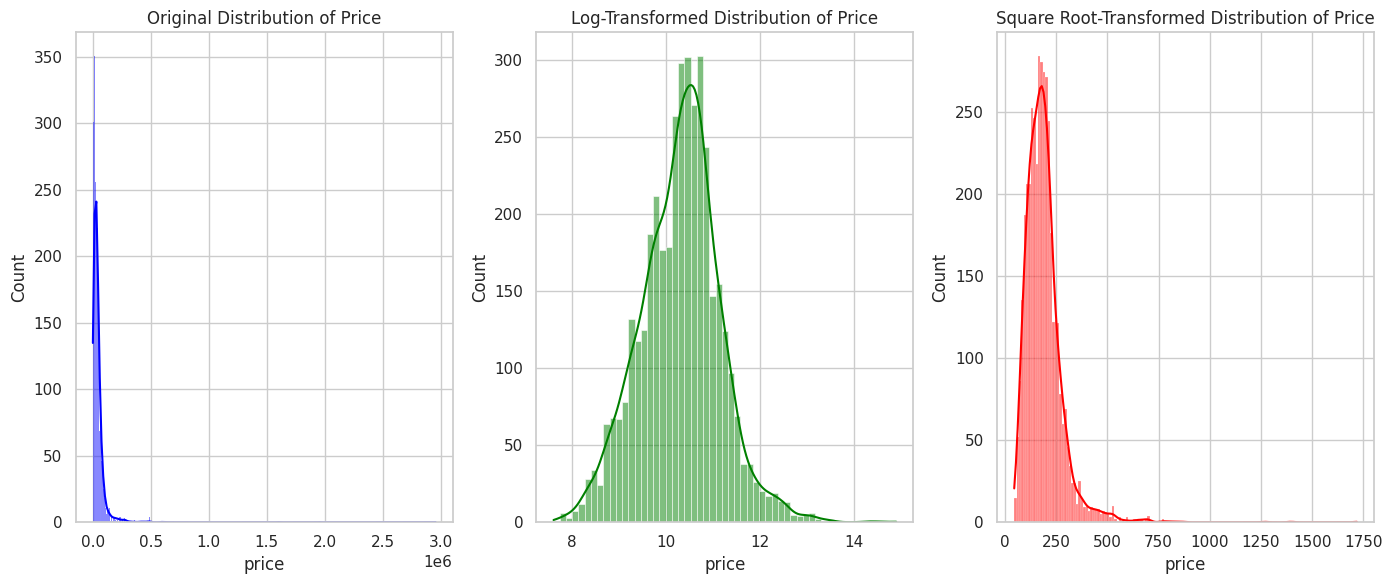

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

y_new = df_use['price']

# Visualize the distribution of the target variable (price)
plt.figure(figsize=(14, 6))

# Original Distribution
plt.subplot(1, 3, 1)
sns.histplot(y_new, kde=True, color="blue")
plt.title("Original Distribution of Price")

# Log Transformation
y_log = np.log1p(y_new)  # log1p to handle zero or negative values
plt.subplot(1, 3, 2)
sns.histplot(y_log, kde=True, color="green")
plt.title("Log-Transformed Distribution of Price")

# Square Root Transformation
y_sqrt = np.sqrt(y_new)
plt.subplot(1, 3, 3)
sns.histplot(y_sqrt, kde=True, color="red")
plt.title("Square Root-Transformed Distribution of Price")

plt.tight_layout()
plt.show()

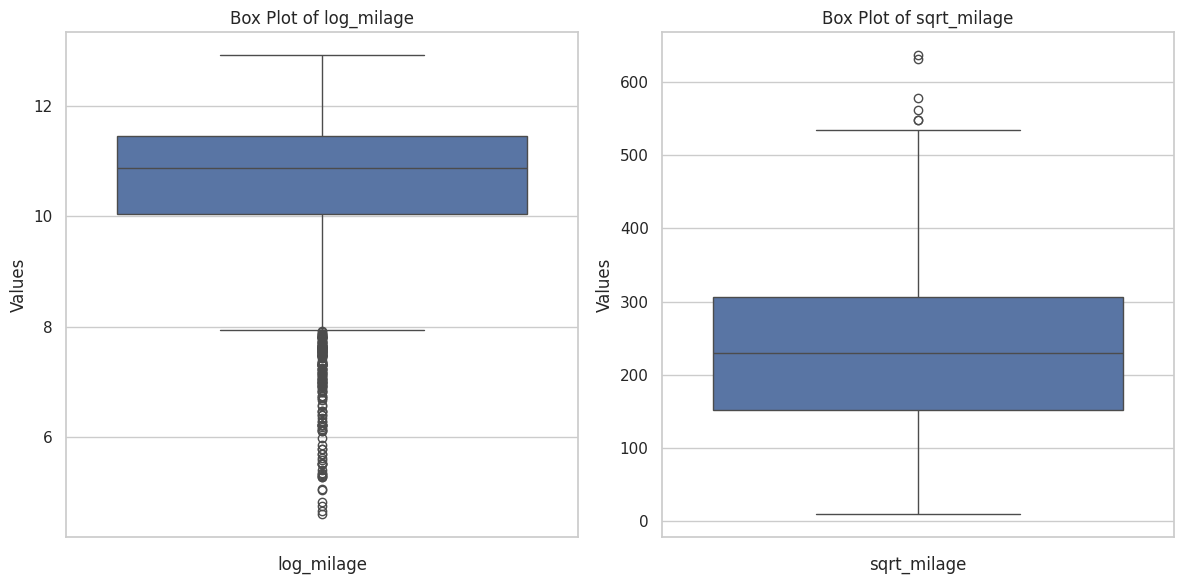

In [46]:
# Compare Log transformation and square root transformation for variable milage
import seaborn as sns
import matplotlib.pyplot as plt
df_use['log_milage'] = np.log(df_use['milage'] + 1)
df_use['sqrt_milage'] = np.sqrt(df_use['milage'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_use['log_milage'])
plt.title('Box Plot of log_milage')
plt.xlabel('log_milage')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_use['sqrt_milage'])
plt.title('Box Plot of sqrt_milage')
plt.xlabel('sqrt_milage')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

#sqrt is better

In [47]:
# Apply log transformation to the target variable (price)
df_use['price_log'] = np.log1p(df_use['price'])

# Remove the original price column from df_encoded
df_use = df_use.drop(columns=['price', 'log_milage','milage'])
df_use.head()

,brand_Rolls-Royce,brand_Lamborghini,brand_Ferrari,model_Aventador SVJ Base,brand_Porsche,model_year,brand_Bentley,transmission_7-Speed Automatic with Auto-Shift,int_col_Brandy,int_col_Black / Brown,...,model_Phantom,engine_4.0L V8 32V GDI DOHC Twin Turbo,ext_col_China Blue,ext_col_–,model_Metris Base,ext_col_Black,transmission_6-Speed Manual,int_col_Black,sqrt_milage,price_log
0,0,0,0,0,0,2013,0,0,0,0,...,0,0,0,0,0,1,0,1,225.831796,9.239996
1,0,0,0,0,0,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,186.392060,10.545499
2,0,0,0,0,0,2022,0,0,0,0,...,0,0,0,0,0,0,0,1,149.572725,10.907771
3,0,0,0,0,0,2015,0,0,0,0,...,0,0,0,0,0,1,0,1,298.161030,9.648660
4,0,0,0,0,0,2021,0,0,0,0,...,0,0,0,0,0,0,0,1,99.171569,10.463103


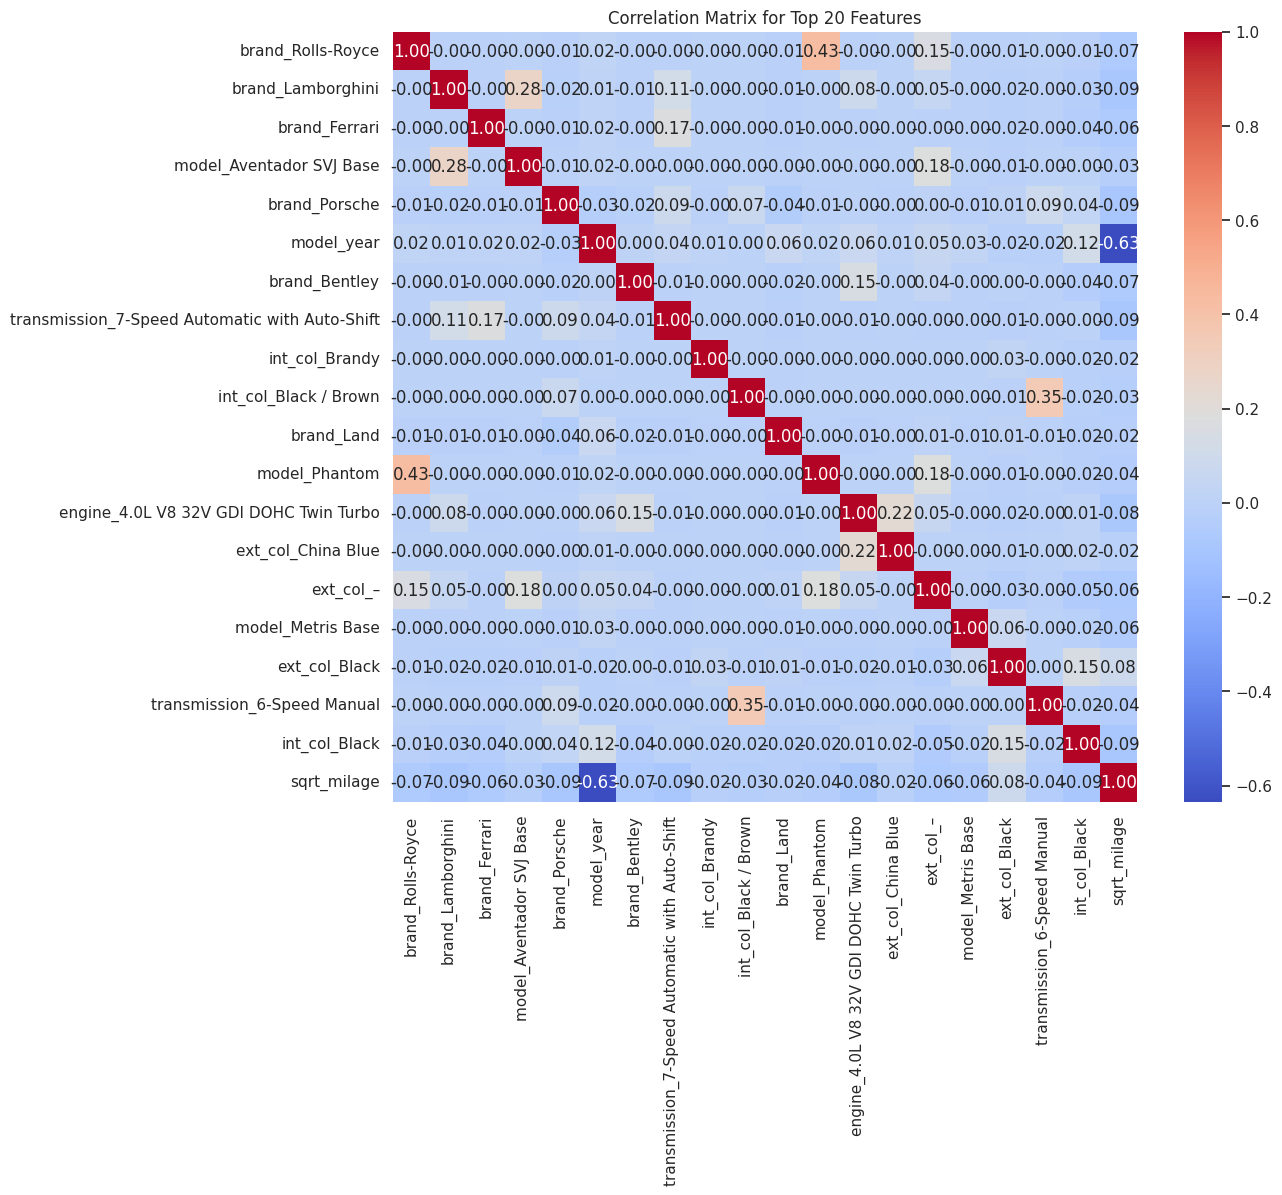

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation plot for 20 features in df_use

# Subset the encoded dataset to include only the top 20 features
feature_data = df_use.drop(columns=['price_log'])

# Calculate the correlation matrix
correlation_matrix = feature_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Top 20 Features')
plt.show()

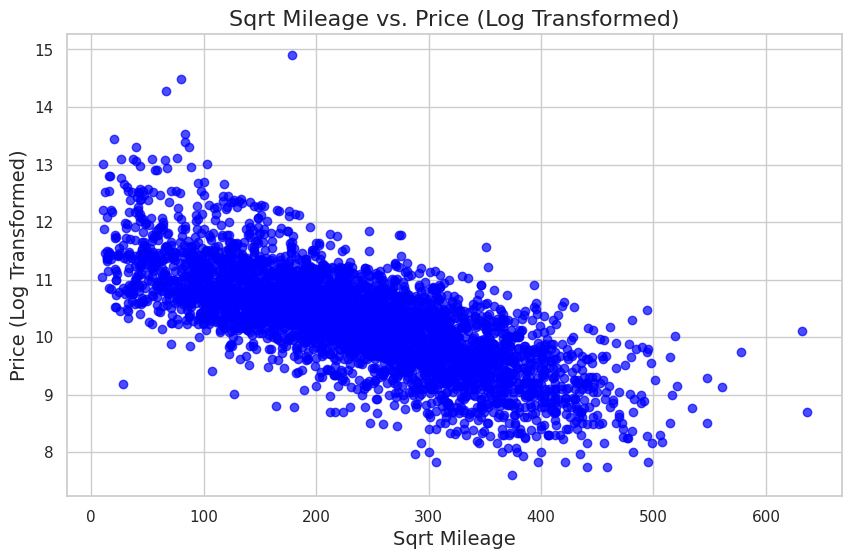

In [49]:
# Plot Mileage vs. log_price
plt.figure(figsize=(10, 6))
plt.scatter(df_use['sqrt_milage'], df_use['price_log'], alpha=0.7, color='blue')
plt.title('Sqrt Mileage vs. Price (Log Transformed)', fontsize=16)
plt.xlabel('Sqrt Mileage', fontsize=14)
plt.ylabel('Price (Log Transformed)', fontsize=14)
plt.grid(True)
plt.show()

In [50]:
# Data : dropped model_year
df_drop_modelYear = df_use.copy()
df_drop_modelYear = df_drop_modelYear.drop(columns = ['model_year'])
df_drop_modelYear.head()

,brand_Rolls-Royce,brand_Lamborghini,brand_Ferrari,model_Aventador SVJ Base,brand_Porsche,brand_Bentley,transmission_7-Speed Automatic with Auto-Shift,int_col_Brandy,int_col_Black / Brown,brand_Land,model_Phantom,engine_4.0L V8 32V GDI DOHC Twin Turbo,ext_col_China Blue,ext_col_–,model_Metris Base,ext_col_Black,transmission_6-Speed Manual,int_col_Black,sqrt_milage,price_log
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,225.831796,9.239996
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186.392060,10.545499
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,149.572725,10.907771
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,298.161030,9.648660
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,99.171569,10.463103


In [51]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Random forest with cross validation
def rf_regressor_cv(data, n_estimators, max_depth, folds):

  # Set features and target
  X = data.drop(columns=['price_log'])
  y = data['price_log']

  # Initialize lists to store R^2 and MSE for each fold
  r2_scores = []
  mse_scores = []

  # Initialize K-Fold cross-validator
  kf = KFold(folds, shuffle=True, random_state=42)

  for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train the Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_regressor.fit(X_train_fold, y_train_fold)

    # Make predictions on the test fold
    y_pred_fold = rf_regressor.predict(X_test_fold)

    # Calculate R^2 and MSE for this fold
    r2 = r2_score(y_test_fold, y_pred_fold)
    mse = mean_squared_error(y_test_fold, y_pred_fold)

    r2_scores.append(r2)
    mse_scores.append(mse)

  avg_r2 = np.mean(r2_scores)
  avg_mse = np.mean(mse_scores)

  return avg_r2, avg_mse



In [52]:
# Random forest CV score for datat wtih top 20 feature
avg_r2_1, avg_mse_1 = rf_regressor_cv(df_use, n_estimators=100, max_depth=10, folds=5)

# Print the results
print("Average R^2 Score:", avg_r2_1)
print("Average MSE:", avg_mse_1)

Average R^2 Score: 0.6838123740070564
Average MSE: 0.2286541517481398


In [53]:
# Random forest CV score for data dropped model_year
avg_r2_2, avg_mse_2 = rf_regressor_cv(df_drop_modelYear, n_estimators=100, max_depth=10, folds=5)

# Print the results
print("Average R^2 Score:", avg_r2_2)
print("Average MSE:", avg_mse_2)

Average R^2 Score: 0.60444549742254
Average MSE: 0.28591015674736836


In [54]:
# Radom forest - hyperparameter tuning

from sklearn.model_selection import GridSearchCV

rf_X = df_use.drop(columns=['price_log'])
rf_y = df_use['price_log']

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth':[5, 10, 20]
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)
grid_search.fit(rf_X, rf_y)

# Best parameters from GridSearch
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 300}


In [55]:
# Random forest CV score for datat wtih top 20 feature - with hyperparameter tuning
avg_r2_rf, avg_mse_rf = rf_regressor_cv(df_use, n_estimators=300, max_depth=10, folds=5)
# Print the results
print("Average R^2 Score:", avg_r2_rf)
print("Average MSE:", avg_mse_rf)

Average R^2 Score: 0.6840744513597271
Average MSE: 0.22848096366184953


Average R² Score: 0.6840744513597271
Average MSE: 0.22848096366184953


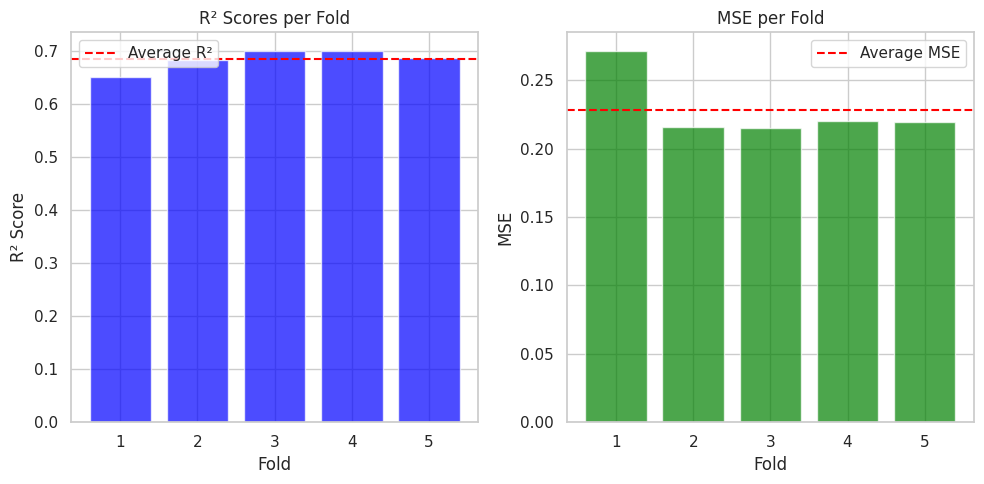

In [67]:
# plot over each fold

def rf_regressor_cv(data, n_estimators, max_depth, folds=5):
    X = data.drop(columns=['price_log'])
    y = data['price_log']
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    r2_scores = []
    mse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)

        # Make predictions
        y_pred = rf.predict(X_test)

        # Calculate R^2 and MSE
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Store the results
        r2_scores.append(r2)
        mse_scores.append(mse)

    # Calculate average R² and MSE
    avg_r2 = np.mean(r2_scores)
    avg_mse = np.mean(mse_scores)

    # Return scores and all fold results
    return avg_r2, avg_mse, r2_scores, mse_scores

# Perform cross-validation
avg_r2_rf, avg_mse_rf, r2_scores, mse_scores = rf_regressor_cv(df_use, n_estimators=300, max_depth=10, folds=5)

# Print the average results
print("Average R² Score:", avg_r2_rf)
print("Average MSE:", avg_mse_rf)

# Plot the results for each fold
plt.figure(figsize=(10, 5))

# R^2 Scores per fold
plt.subplot(1, 2, 1)
plt.bar(range(1, len(r2_scores) + 1), r2_scores, color='blue', alpha=0.7)
plt.axhline(y=avg_r2_rf, color='red', linestyle='--', label='Average R²')
plt.title("R² Scores per Fold")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.legend()

# MSE per fold
plt.subplot(1, 2, 2)
plt.bar(range(1, len(mse_scores) + 1), mse_scores, color='green', alpha=0.7)
plt.axhline(y=avg_mse_rf, color='red', linestyle='--', label='Average MSE')
plt.title("MSE per Fold")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.legend()

plt.tight_layout()
plt.show()

Ridge starts here

In [68]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_ridge = df_use.copy()

scaler = StandardScaler()
df_ridge[['sqrt_milage', 'model_year']] = scaler.fit_transform(df_ridge[['sqrt_milage', 'model_year']])

ridge_X = df_ridge.drop(columns=['price_log'])
ridge_y = df_ridge['price_log']

X_train, X_test, y_train, y_test = train_test_split(ridge_X, ridge_y, test_size=0.3, random_state=42)

# Define parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Initialize Ridge regression
ridge = Ridge()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best alpha
print("Best Alpha:", grid_search.best_params_['alpha'])


Best Alpha: 0.01


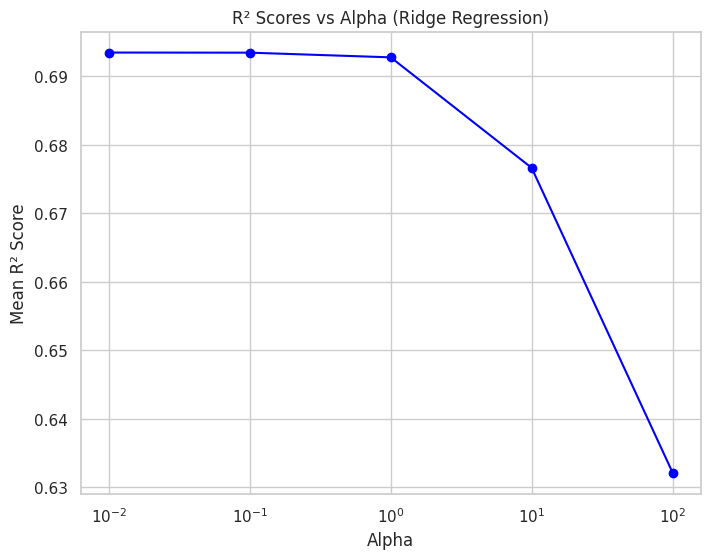

In [69]:
# Extract mean test scores and corresponding alpha values
alphas = grid_search.cv_results_['param_alpha']
r2_scores = grid_search.cv_results_['mean_test_score']

# Plot R² scores against alpha values
plt.figure(figsize=(8, 6))
plt.plot(alphas, r2_scores, marker='o', linestyle='-', color='blue')
plt.title("R² Scores vs Alpha (Ridge Regression)")
plt.xlabel("Alpha")
plt.ylabel("Mean R² Score")
plt.xscale('log')  # Log scale for alpha
plt.grid(True)
plt.show()

In [70]:
ridge = Ridge(alpha=0.01)  # Regularization strength
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.6392411739345817
Mean Squared Error: 0.26513894052471476


In [71]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

# Ridge Regression with specific alpha
ridge = Ridge(alpha=0.01)

# Perform 5-fold cross-validation for R^2
cv_r2_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

# Perform 5-fold cross-validation for MSE
cv_mse_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate average scores
avg_r2 = cv_r2_scores.mean()
avg_mse = -cv_mse_scores.mean()  # Negate MSE because cross_val_score returns negative MSE

# Print results
print("Mean Cross-Validated R^2 Score:", avg_r2)
print("Mean Cross-Validated MSE:", avg_mse)

Mean Cross-Validated R^2 Score: 0.6934821270382538
Mean Cross-Validated MSE: 0.21926782538893583


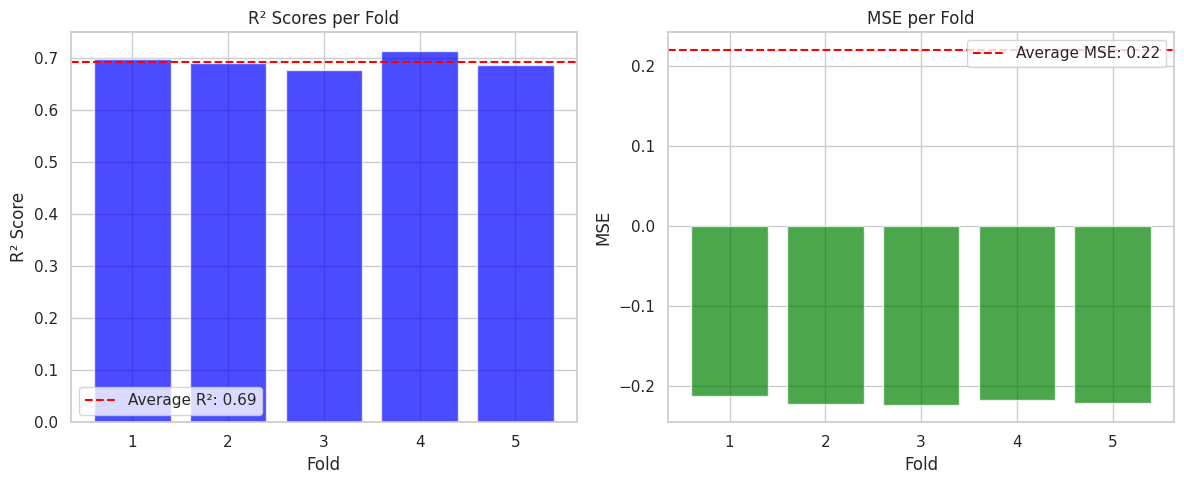

In [72]:
# Plot R^2 and MSE for each fold
plt.figure(figsize=(12, 5))

# R^2 Scores per fold
plt.subplot(1, 2, 1)
plt.bar(range(1, len(cv_r2_scores) + 1), cv_r2_scores, color='blue', alpha=0.7)
plt.axhline(y=avg_r2, color='red', linestyle='--', label=f'Average R²: {avg_r2:.2f}')
plt.title("R² Scores per Fold")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.legend()

# MSE per fold
plt.subplot(1, 2, 2)
plt.bar(range(1, len(cv_mse_scores) + 1), cv_mse_scores, color='green', alpha=0.7)
plt.axhline(y=avg_mse, color='red', linestyle='--', label=f'Average MSE: {avg_mse:.2f}')
plt.title("MSE per Fold")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.legend()

plt.tight_layout()
plt.show()

Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.001, 'solver': 'adam'}
Train MSE: 0.2607134611058275
Test MSE: 0.34173330825483017
Train R^2: 0.7373044191818154
Test R^2: 0.6640927767449571


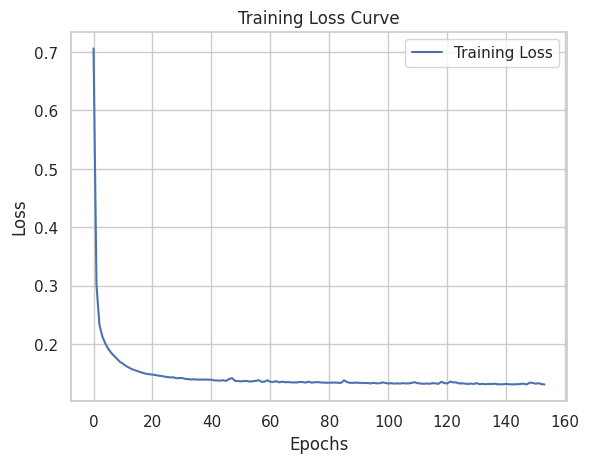

In [61]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Use the scaled DataFrame
df = df_use.copy()

# Standardize the features and target variable
scaler = StandardScaler()
df[['price_log', 'sqrt_milage', 'model_year']] = scaler.fit_transform(df[['price_log', 'sqrt_milage', 'model_year']])

# Define features and target
X = df.drop(columns=['price_log'])
y = df['price_log']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the MLP Regressor
mlp = MLPRegressor(max_iter=500)

# Hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(32, 16), (64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.001, 0.01],
    'learning_rate_init': [1e-3, 1e-4]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='r2', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters and model
best_mlp = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model
y_pred_train = best_mlp.predict(X_train)
y_pred_test = best_mlp.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

# Plotting convergence (simplified for fewer epochs)
train_loss = best_mlp.loss_curve_

plt.plot(train_loss, label="Training Loss")
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()